In [1]:
import sys
sys.path.insert(1, '../../../cell2cell/')
import cell2cell as c2c
from cell2cell.tensor.tensor import BaseTensor

sys.path.insert(1, '../../../scripts/')
from simulation.simulate import Simulate, CCI_MD

# Generate Simulated Tensor

In [27]:
# init
sim = Simulate() 

# simulate a scale_free randomly connected ligand-receptor network (potential interactions)
sim.LR_network(network_type = 'scale-free', **{'nodes': 100, 'degrees': 3, 'alpha': 2}) #scale-free

# LR metadata
sim.LR.generate_metadata(n_LR_cats = {3: 0}, cat_skew = 0)

# generate cell metadata, accounting for directionality (senders vs receivers) and 
# allowing for autocrine interactions 
cci = CCI_MD()
cci.cci_network(n_cells = 50, directional = True, autocrine = True)

# generate 1 metadata categories, with 3 subcategories and 0 skew, the overall skew of categories is 0
# do not remove homotypic interactions (will be included)
cci.generate_metadata(n_cell_cats = {3: 0}, cat_skew = 0, remove_homotypic = 0)
# add cell metadata to simulation object
sim.cci = cci

# generate n_patter metadata groups of CC-LR pairs that change across n_conditions
# these changes can either be linear, oscillating, or a pulse; allow homotypic interactions to form patterns
# maximize the possible change in communication score
sim.generate_tensor_md(n_patterns = 4, n_conditions = 12, patterns = ['pulse', 'linear', 'oscillate', 'power'], 
                      consider_homotypic = True, score_change = 'max')

#generate a tensor with continuous LR scores and baseline noise; keep single-cells 
sim.generate_tensor(noise = 0.1, binary = False, bulk = True, noise_max = None)

# format the tensor to be input to tensor-cell2cell
sim.reshape()

/home/hratch/Projects/cci_dt/notebooks/simulation/other_analyses/tmpo6wvcg_b_bipartite_sf.csv
Generate undirected, bipartite, scale-free graph
Check network properties
All properties are as expected


../../../scripts/simulation/graphs.py:164: UserWarning: 65 nodes are disconnected, removing from network
  warnings.warn(mssg)
/home/hratch/anaconda3/envs/cci_dt/lib/python3.9/site-packages/pandas/core/internals/blocks.py:983: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.array(value)
../../../scripts/simulation/simulate.py:645: UserWarning: Only continuous scoring is currently implemented
  warnings.warn('Only continuous scoring is currently implemented')
../../../scripts/simulation/utils.py:19: RuntimeWarning: invalid value encountered in double_scalars
  (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd).rvs(n)
../../../scripts/simulation/utils.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  (low - mean) / sd, (upp - mean

ValueError: Domain error in arguments.

In [20]:
t1 = sim.sim_tensor.tensor_cci

In [21]:
tensor.tensor = t1
tensor.order_names = [['Context-{}'.format(c+1) for c in range(t1.shape[0])],
                      ['LR-{}'.format(c+1) for c in range(t1.shape[1])],
                      ['Sender-{}'.format(c+1) for c in range(t1.shape[2])],
                      ['Receiver-{}'.format(c+1) for c in range(t1.shape[3])]
                     ]

/home/hratch/anaconda3/envs/cci_dt/lib/python3.9/site-packages/numpy/lib/function_base.py:793: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


  0%|          | 0/5 [00:00<?, ?it/s]

/home/hratch/anaconda3/envs/cci_dt/lib/python3.9/site-packages/tensorly/backend/core.py:779: RuntimeWarning: invalid value encountered in sqrt
  S = np.where(np.abs(S) <= np.finfo(S.dtype).eps, 0, np.sqrt(S))
/home/hratch/anaconda3/envs/cci_dt/lib/python3.9/site-packages/tensorly/backend/core.py:785: RuntimeWarning: invalid value encountered in sqrt
  S = np.where(np.abs(S) <= np.finfo(S.dtype).eps, 0, np.sqrt(S))


(<Figure size 288x162 with 1 Axes>,
 [(1, 0.5531082626367102),
  (2, 0.5531082626367101),
  (3, nan),
  (4, nan),
  (5, nan)])

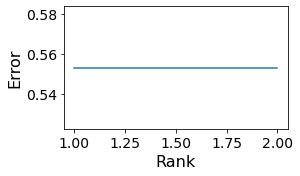

In [22]:
tensor.elbow_rank_selection(5)

In [23]:
sim.clrm

,cell_subcat,LR_subcat,ts_coordinates,change,pattern,0,1,2,3,4,5,6,7,8,9,10,11
0,"(b8b0ad4ec0c8, e0eab35b7eeb)",f1a31f71de70,"[(0, 4, 5, 6, 8, 12, 14, 18, 19, 20, 21, 24, 2...",0.75,linear,0.25,0.318182,0.386364,0.454545,0.522727,0.590909,0.659091,0.727273,7.954545e-01,8.636364e-01,9.318182e-01,1.000000e+00
1,"(e0eab35b7eeb, e0eab35b7eeb)",f1a31f71de70,"[(0, 4, 5, 6, 8, 12, 14, 18, 19, 20, 21, 24, 2...",0.50,pulse,0.50,0.500000,0.500000,0.500000,0.750000,1.000000,1.000000,0.750000,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01
2,"(e0eab35b7eeb, e0eab35b7eeb)",ebf6d1f0d399,"[(1, 3, 9, 11, 15, 22, 23, 25, 26, 35, 36, 38,...",-0.75,power,0.75,0.117014,0.018256,0.002848,0.000444,0.000069,0.000011,0.000002,2.633124e-07,4.108161e-08,6.409494e-09,1.000000e-09
3,"(6081958b04b5, e0eab35b7eeb)",ebf6d1f0d399,"[(1, 3, 9, 11, 15, 22, 23, 25, 26, 35, 36, 38,...",-1.00,oscillate,1.00,0.500000,0.000000,0.500000,1.000000,0.500000,0.000000,0.500000,1.000000e+00,5.000000e-01,0.000000e+00,5.000000e-01


In [24]:
r = 2

In [25]:
tensor.compute_tensor_factorization(rank=r)

/home/hratch/anaconda3/envs/cci_dt/lib/python3.9/site-packages/tensorly/backend/core.py:779: RuntimeWarning: invalid value encountered in sqrt
  S = np.where(np.abs(S) <= np.finfo(S.dtype).eps, 0, np.sqrt(S))


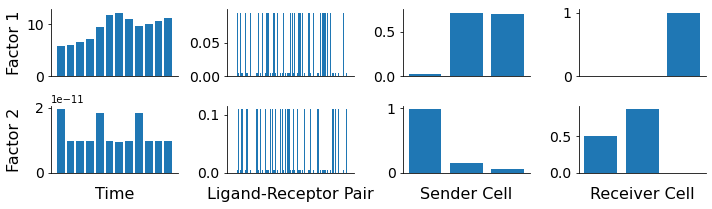

In [26]:
fig, axes = c2c.plotting.tensor_factors_plot(interaction_tensor=tensor,
                                             order_labels=['Time', 'Ligand-Receptor Pair', 'Sender Cell', 'Receiver Cell'],
                                             #metadata = tensor.order_names,
                                             #sample_col='Order',
                                             #group_col='Element',
                                             #meta_cmaps=['viridis', 'tab20', 'Pastel1', 'Pastel1'],
                                             fontsize=14,
                                             #filename='./outputs/TF-LogMean.svg'
                                            )